# Introdução à Programação em Física
# Prova 2

### Professor: Gustavo Guerrero

## Alunos:
1. Thomas Miler dos Santos


### Prova diferente

Essa prova consiste em formular e resolver os pontos da sua prova.  


Deve formular 2 perguntas que devem ser resolvidas usando os métodos aprendidos nos capítulos sobre algebra linear, equaçoes diferenciais ordinarias e analise de Fourier. As regras da prova são as seguintes:

1. Não podem ser problemas iguais aos vistos na sala de aula.

2. Podem ser problemas em qualquer área da ciência. Mas não um exercicio matemático, ou seja, devem ter aplicação.

2. Devem ser resolvidos com as rotinas e métodos estudados (e.g., se  o problema se resolve com Runge-Kutta, devem usar a rotina usada na sala de aula).

3. Cada pergunta deve ser formulada claramente, com os parámetros e condições a ser utilizadas, as respostas devem responder as perguntas usando métodos numéricos. 

Note que a solução numérica é a alternativa a ser usada quando a solução analítica é muito dificil. Pense nisso na hora de escolher o problema. 




## Movimento bidimensional de dois e três corpos

Um exemplo de sistema gravitacional de dois corpos é o sistema Terra-Sol. Vamos considerar o Sol parado e como a origem do sistema de coordenadas
e vamos chamar a posição da Terra de $\vec{r}$. A força gravitacional do Sol na Terra é:
$$
    \vec{F} = -G \frac{M_{Sol}M_{Terra}}{r^3} \,\, \vec{r} \,\,.
$$

A única força atuando na Terra vai ser a atração gravitacional exercida pelo Sol. A equação de Newton pra Terra fica então:
$$
M_{Terra} \frac{d^2 \vec{r}}{dt^2} = \vec{F} = -G \frac{M_{Sol}M_{Terra}}{r^3} \,\, \vec{r} \,\,.
$$
Manipulando um pouco essa equação encontramos:
$$
\frac{d^2 \vec{r}}{dt^2} = -G \frac{M_{Sol}}{r^3} \,\, \vec{r} \,\,,
$$
precisando agora abrir essa equação nas direções em que a força é exercida. Se considerarmos a órbita da Terra como sendo planar, temos $\vec{r(t)} = (x(t),y(t))$. Ficamos então com as seguintes equações diferenciais:
$$
\frac{d^2x}{dt^2} = -GM_{Sol} \frac{x}{(x^2+y^2)^{3/2}}
$$
$$
\frac{d^2y}{dt^2} = -GM_{Sol} \frac{y}{(x^2+y^2)^{3/2}}
$$

O último passo é transformar as equações de segunda ordem em duas equações de primeira ordem. Definimos então as variáveis u e v como as primeiras derivadas de x e y:
$$
u = \frac{dx}{dt} \qquad,\qquad v = \frac{dy}{dt}
$$
assim ficamos com as quatro equações de primeira ordem acopladas
$$
\frac{du}{dt} = -GM_{Sol} \frac{x}{(x^2+y^2)^{3/2}} \qquad,\qquad \frac{dx}{dt} = u
$$
$$
\frac{dv}{dt} = -GM_{Sol} \frac{y}{(x^2+y^2)^{3/2}} \qquad,\qquad \frac{dy}{dt} = v
$$

Chegando em equações diferenciais com a seguinte cara:
$$
    \frac{du}{dt} = f(t,x,y) \qquad,\qquad \frac{dv}{dt} = g(t,x,y) 
$$
$$
    \frac{dx}{dt} = h(t,u) \qquad,\qquad \frac{dy}{dt} = i(t,v)
$$

Sendo então necessário para utilizar o método de Runge-Kutta, Euler, ou qualquer outro, que seja forncido as funções f,g,h e i.


#### 1) Suponha dois corpos interagindo gravitacionalmente em determinado intervalo de tempo. 

a) Sendo os dados iniciais fornecidos para o corpo 1:

$\vec{r(t)} = (10, 0)$, $\vec{v(t)} = (1, 1)$ e massa $m=100.0$
    
e para o corpo 2: 

$\vec{r(t)} = (0, 0)$, $\vec{v(t)} = (0, 0)$ e massa $m=1.0$
    
Escreva um código que descreva o movimento desses corpos interagindo gravitacionalmente e estipule a posição $\vec{r(t)} = (x, y)$ final do corpo 2 no instante $t=50$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simula_traj(x10, vx10, y10, vy10,x20, vx20, y20, vy20,dt, t0, tf, Fx, Fy):
    
    m1 = 100.0
    m2 = 1.0
    # alocando variáveis x, y e t
    n = int(np.ceil((tf - t0)/dt))
    x1 = np.zeros([n,1])
    y1 = np.zeros([n,1])
    vx1 = np.zeros([n,1])
    vy1 = np.zeros([n,1])
    x2 = np.zeros([n,1])
    y2 = np.zeros([n,1])
    vx2 = np.zeros([n,1])
    vy2 = np.zeros([n,1])
    t = np.zeros([n,1])
    
    # inicializar as variáveis que serão simuladas
    x1[0] = x10
    y1[0] = y10
    vx1[0] = vx10
    vy1[0] = vy10
    x2[0] = x20
    y2[0] = y20
    vx2[0] = vx20
    vy2[0] = vy20
    t[0] = t0
    
    
    # loop pra simular a trajetória
    for k in range(1, n):
        
        # calcular a aceleração ( a = F_tot/m)
        ax1 = Fx(m1, m2, x1[k-1], y1[k-1], x2[k-1], y2[k-1]) / m1
        ay1 = Fy(m1, m2, x1[k-1], y1[k-1], x2[k-1], y2[k-1])/ m1
        ax2 = Fx(m1, m2, x2[k-1], y2[k-1], x1[k-1], y1[k-1]) / m2
        ay2 = Fy(m1, m2, x2[k-1], y2[k-1], x1[k-1], y1[k-1]) / m2
        
        # dada a velocidade atual, calcular a velocidade em t+dt
        vx1[k] = vx1[k-1]+ ax1*dt
        vy1[k] = vy1[k-1]+ ay1*dt
        vx2[k] = vx2[k-1]+ ax2*dt
        vy2[k] = vy2[k-1]+ ay2*dt
        
        # dado a posição atual, calcula a posição em t+dt
        x1[k] = x1[k-1] + vx1[k]*dt
        y1[k] = y1[k-1] + vy1[k]*dt
        x2[k] = x2[k-1] + vx2[k]*dt
        y2[k] = y2[k-1] + vy2[k]*dt
        # dado o instante atual, calcular o próximo t[k]
        t[k] = t[k-1] + dt
          
    
    return [t, x1, y1, x2, y2]


# lei de força do sistema (sistema gravitacional)
# fg = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [x2-x1, y2-y1]
# fg21x(m1, m2, x1, x2 y1, y2) = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [x2-x1]
# fg21y(m1, m2, x1, x2, y1, y2) = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [y2-y1]

def Fy(m1, m2, x1, y1, x2, y2):
    G = 1
    return (((G*m1*m2) * (y2-y1)) / (( (x1-x2)**2 + (y1-y2)**2)**(3/2)) )

def Fx(m1, m2, x1, y1, x2, y2):
    G = 1
    return (((G*m1*m2) * (x2-x1))/ (((x1-x2)**2 + (y1-y2)**2)**(3/2)))


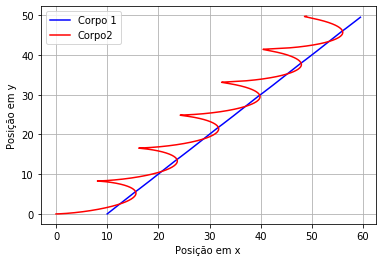

In [3]:
#definis os parametros da simulação
x10 = 10.0
vx10 = 1.0
y10 = 0.0
vy10 = 1.0

x20 = 0.0
vx20 = 0.0
y20 = 0.0
vy20 = 0.0

dt = 0.01
t0 = 0.0
tf = 50.0

#fazer a simulação
t, x1, y1, x2, y2 = simula_traj(x10, vx10, y10, vy10, x20, vx20, y20, vy20, dt, t0, tf, Fx, Fy)

plt.plot(x1,y1, 'b-', label='Corpo 1')
plt.plot(x2,y2, 'r-', label='Corpo2')
plt.xlabel('Posição em x')
plt.ylabel('Posição em y')
plt.legend()
plt.grid()


In [13]:
# Preciso plotar aqui as posições do Corpo 2
posicoes=[]
c=0
for i in t:
    if t[c]==t[-1]:
        posicoes.append([x2[c],y2[c]])
    c+=1

print(posicoes)
    

[[array([48.9434185]), array([49.74112626])]]


b) Suponha que um terceiro corpo com condições iniciais

$\vec{r(t)} = (20, 30)$, $\vec{v(t)} = (0.1, 0.1)$ e massa $m=20$

seja adicionado ao sistema. Escreva um código que mostre o comportamento destes três corpos interagindo gravitacionalmente entre si e encontre a posição do Corpo 2 sob estas novas condições para um mesmo instante $t=50$.

In [15]:
def simula_traj(x10, vx10, y10, vy10,
                x20, vx20, y20, vy20,
                x30, vx30, y30, vy30,
                dt, t0, tf, Fx, Fy):
    
    m1 = 100
    m2 = 1
    m3 = 20
    # alocando variáveis x, y e t
    n = int(np.ceil((tf - t0)/dt))
    x1 = np.zeros([n,1])
    y1 = np.zeros([n,1])
    vx1 = np.zeros([n,1])
    vy1 = np.zeros([n,1])
    
    x2 = np.zeros([n,1])
    y2 = np.zeros([n,1])
    vx2 = np.zeros([n,1])
    vy2 = np.zeros([n,1])
    
    x3 = np.zeros([n,1])
    y3 = np.zeros([n,1])
    vx3 = np.zeros([n,1])
    vy3 = np.zeros([n,1])
    
    t = np.zeros([n,1])
    
    # inicializar as variáveis que serão simuladas
    x1[0] = x10
    y1[0] = y10
    vx1[0] = vx10
    vy1[0] = vy10
    
    x2[0] = x20
    y2[0] = y20
    vx2[0] = vx20
    vy2[0] = vy20
    
    x3[0] = x30
    y3[0] = y30
    vx3[0] = vx30
    vy3[0] = vy30
    
    t[0] = t0
    
    
    # loop pra simular a trajetória
    for k in range(1, n):
        
        # calcular a aceleração ( a = F_tot/m)
        ax1 = ( Fx(m1, m2, x1[k-1], y1[k-1], x2[k-1], y2[k-1]) +
                Fx(m1, m3, x1[k-1], y1[k-1], x3[k-1], y3[k-1]) )/ m1  
        ay1 = ( Fy(m1, m2, x1[k-1], y1[k-1], x2[k-1], y2[k-1]) +
                Fy(m1, m3, x1[k-1], y1[k-1], x3[k-1], y3[k-1]) )/ m1
        
        
        ax2 = ( Fx(m2, m1, x2[k-1], y2[k-1], x1[k-1], y1[k-1]) +
                Fx(m2, m3, x2[k-1], y2[k-1], x3[k-1], y3[k-1]) )/ m2
        ay2 = ( Fy(m2, m1, x2[k-1], y2[k-1], x1[k-1], y1[k-1]) +
                Fy(m2, m3, x2[k-1], y2[k-1], x3[k-1], y3[k-1]) )/ m2
        
        
        ax3 = ( Fx(m3, m1, x3[k-1], y3[k-1], x1[k-1], y1[k-1]) +
                Fx(m3, m2, x3[k-1], y3[k-1], x2[k-1], y2[k-1]) )/ m3 
        ay3 = ( Fy(m3, m1, x3[k-1], y3[k-1], x1[k-1], y1[k-1]) +
                Fy(m3, m2, x3[k-1], y3[k-1], x2[k-1], y2[k-1]) )/ m3
        
        
        # dada a velocidade atual, calcular a velocidade em t+dt
        vx1[k] = vx1[k-1]+ ax1*dt
        vy1[k] = vy1[k-1]+ ay1*dt
        vx2[k] = vx2[k-1]+ ax2*dt
        vy2[k] = vy2[k-1]+ ay2*dt
        vx3[k] = vx3[k-1]+ ax3*dt
        vy3[k] = vy3[k-1]+ ay3*dt
        
        # dado a posição atual, calcula a posição em t+dt
        x1[k] = x1[k-1] + vx1[k]*dt
        y1[k] = y1[k-1] + vy1[k]*dt
        x2[k] = x2[k-1] + vx2[k]*dt
        y2[k] = y2[k-1] + vy2[k]*dt
        x3[k] = x3[k-1] + vx3[k]*dt
        y3[k] = y3[k-1] + vy3[k]*dt
        # dado o instante atual, calcular o próximo t[k]
        t[k] = t[k-1] + dt
          
    
    return [t, x1, y1, x2, y2, x3, y3]


# lei de força do sistema (sistema gravitacional)
# fg = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [x2-x1, y2-y1]
# fg21x(m1, m2, x1, x2 y1, y2) = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [x2-x1]
# fg21y(m1, m2, x1, x2, y1, y2) = (G*m1*m2)/[(x1-x2)²+(y1-y2)²]^(3/2)  * [y2-y1]

def Fy(m1, m2, x1, y1, x2, y2):
    G = 1.0
    return (((G*m1*m2) * (y2-y1)) / (( (x1-x2)**2 + (y1-y2)**2)**(3/2)) )

def Fx(m1, m2, x1, y1, x2, y2):
    G = 1.0
    return (((G*m1*m2) * (x2-x1))/ (((x1-x2)**2 + (y1-y2)**2)**(3/2)))


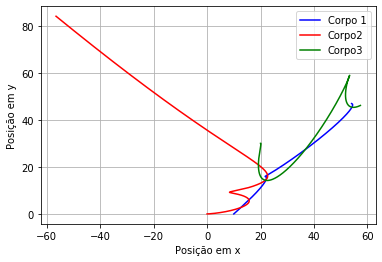

In [16]:
#definis os parametros da simulação
x10 = 10.0
vx10 = 1.0
y10 = 0.0
vy10 = 1.0

x20 = 0.0
vx20 = 0.0
y20 = 0.0
vy20 = 0.0

x30 = 20.0
vx30 = 0.1
y30 = 30.0
vy30 = 0.1

dt = 0.01
t0 = 0.0
tf = 50.0

#fazer a simulação
t, x1, y1, x2, y2, x3, y3 = simula_traj(x10, vx10, y10, vy10,x20, vx20, y20, vy20,x30, vx30, y30, vy30,dt, t0, tf, Fx, Fy)


plt.plot(x1,y1, 'b-', label='Corpo 1')
plt.plot(x2,y2, 'r-', label='Corpo2')
plt.plot(x3,y3, 'g-', label='Corpo3')
plt.xlabel('Posição em x')
plt.ylabel('Posição em y')
plt.legend()
plt.grid()


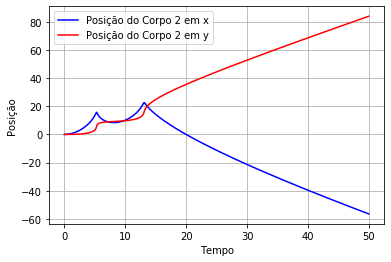

In [17]:
plt.plot(t,x2, 'b-', label='Posição do Corpo 2 em x')
plt.plot(t,y2, 'r-', label='Posição do Corpo 2 em y')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.grid()

In [18]:
# Preciso plotar aqui as posições do Corpo 2 nessas novas condições
posicoes=[]
c=0
for i in t:
    if t[c]==t[-1]:
        posicoes.append([x2[c],y2[c]])
    c+=1

print(posicoes)
    

[[array([-56.51625082]), array([84.05878208])]]
